In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Data Collection and Cleaning

In [ ]:
# Import Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the available data and overview
df=pd.read_csv("/content/gdrive/MyDrive/Sem 4 project/data/raw_online_retail.csv", encoding="ISO-8859-1")
df



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [ ]:
# Look for missing values
df.isnull().sum()
# Look for datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

There are 1454 missing “Description” and 135,080 missing “CustomerID” values. Keeping the missing “Description” values won’t have any impact on the analysis as we will be focusing on understanding our customers. Based on the assumption that each missing “CustomerID” represents a new customer (meaning the missing “CustomerID” values are unique to the dataset), we can also assume that the “CustomerID” missing values wont have any impact to our analysis as well.
We notice that the “InvoiceDate” data type is object and requires to be updated to date data type. We can also take the month and the year from the “InvoiceDate” variable and create new columns with “InvoiceMonth” and “InvoiceYear”.

In [ ]:
# Add Revenue variable and update InvoiceDate 
df["Revenue"]=df["UnitPrice"]*df["Quantity"]
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"]).dt.date
df["InvoiceMonth"]=pd.DatetimeIndex(df["InvoiceDate"]).month
df["InvoiceYear"]=pd.DatetimeIndex(df["InvoiceDate"]).year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,1,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,1,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,1,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,1,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,1,2010


We loaded and performed minor cleaning on our online store data set. We can further analyze the customers

# Data Exploration

Initially we are going to perform basic exploratory statistical analysis in order to understand the variable distribution. Further we will look at how we are doing in terms of revenue within the customers. Revenue is one of the most common and important metrics when it comes to online retail store business models. We would want to make sure our revenue is growing as we are defining scalability within our business.


In [ ]:
# basic statistical analysis
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
 8   Revenue       541909 non-null  float64
 9   InvoiceMonth  541909 non-null  int64  
 10  InvoiceYear   541909 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 45.5+ MB


,Quantity,UnitPrice,CustomerID,Revenue,InvoiceMonth,InvoiceYear
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,6.919828,2010.921609
std,218.081158,96.759853,1713.600303,378.810824,3.363659,0.268787
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,1.000000,2010.000000
25%,1.000000,1.250000,13953.000000,3.400000,4.000000,2011.000000
50%,3.000000,2.080000,15152.000000,9.750000,7.000000,2011.000000
75%,10.000000,4.130000,16791.000000,17.400000,10.000000,2011.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000,2011.000000


Text(0, 0.5, 'Revenue')

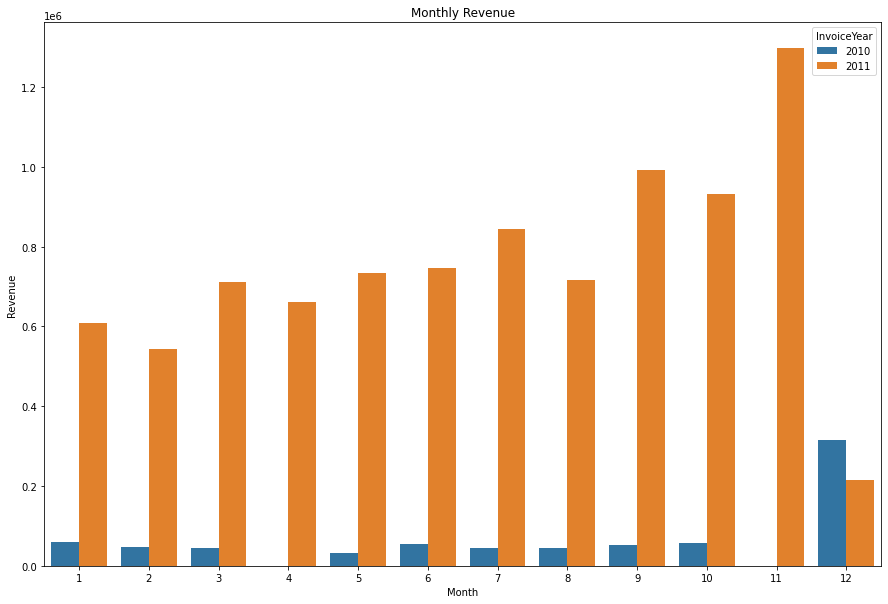

In [ ]:
#Monthly Revenue Overview
df_revenue=df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", data=df_revenue)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

Text(8.822523148148143, 0.5, 'Revenue')

<Figure size 432x288 with 0 Axes>

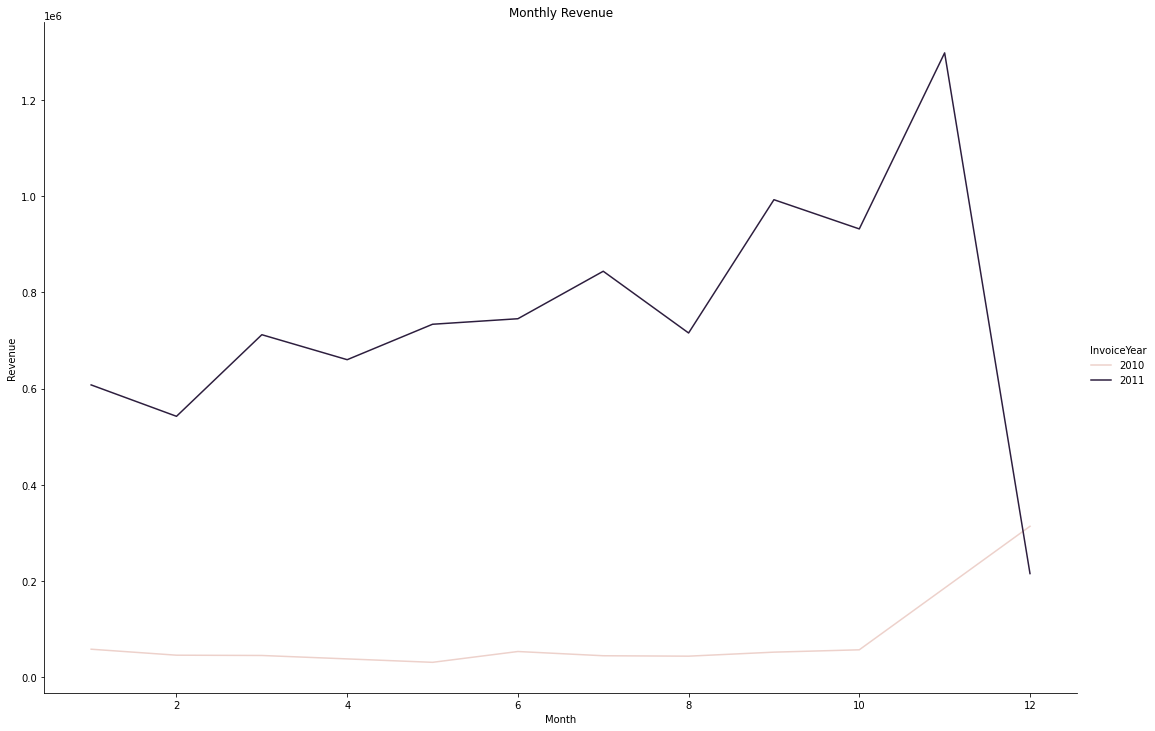

In [ ]:
# Monthly Revenue Overview
plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", kind="line", data=df_revenue, height=10, aspect=15/10)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

What Is Revenue?
Revenue is the income generated from normal business operations and includes discounts and deductions for returned merchandise. It is the top line or gross income figure from which costs are subtracted to determine net income.


\begin{aligned} &\text{Sales Revenue} = \text{Sales Price} \times \text{Number of Units Sold} \\ \end{aligned} 
​	  
Sales Revenue=Sales Price×Number of Units Sold

When we look at the monthly revenue growth, we realize that our data set starts in December 2010 and goes all the way to December 2011. We notice that the revenue slumps around December 2011. We need to see if this is due to customers not purchasing our merchandise or if it is related to an issue within the dataset.

In [ ]:
# Look at the December 2011 data
df_december_2011=df.query("InvoiceMonth==12 and InvoiceYear==2011")
df_december_2011

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
53581,540848,90201B,BLACK ENAMEL FLOWER RING,1,2011-12-01,2.96,NaN,United Kingdom,2.96,12,2011
53582,540848,90201C,RED ENAMEL FLOWER RING,1,2011-12-01,2.96,NaN,United Kingdom,2.96,12,2011
53583,540848,90201D,GREEN ENAMEL FLOWER RING,2,2011-12-01,2.96,NaN,United Kingdom,5.92,12,2011
53584,540848,90204,PAIR OF ENAMEL BUTTERFLY HAIRCLIP,1,2011-12-01,3.39,NaN,United Kingdom,3.39,12,2011
53585,540848,90209B,GREEN ENAMEL+GLASS HAIR COMB,2,2011-12-01,2.11,NaN,United Kingdom,4.22,12,2011
...,...,...,...,...,...,...,...,...,...,...,...
394694,570876,23509,MINI PLAYING CARDS FUN FAIR,4,2011-12-10,0.42,16085.0,United Kingdom,1.68,12,2011
394695,570876,23048,SET OF 10 LANTERNS FAIRY LIGHT STAR,2,2011-12-10,4.15,16085.0,United Kingdom,8.30,12,2011
394696,570876,23503,PLAYING CARDS KEEP CALM & CARRY ON,4,2011-12-10,1.25,16085.0,United Kingdom,5.00,12,2011
394697,570876,22696,WICKER WREATH LARGE,3,2011-12-10,1.95,16085.0,United Kingdom,5.85,12,2011


Based on the december 2011 data, we understand that the data set does not include any purchases after December 9th 2011. We need to make sure, we consider this within our analysis and conclusion.
On a separate note; we can see that the revenue grows steadily starting from September 2011 all the way up to December 2011, November being the best month in terms of revenue.


Text(0, 0.5, 'Items Sold')

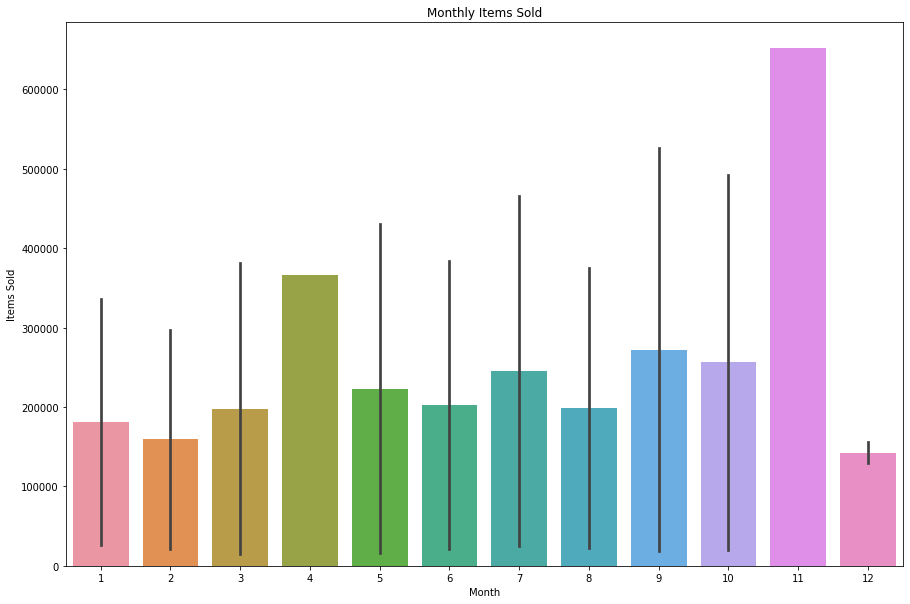

In [ ]:
# Monthly Items Sold Overview
df_quantity=df.groupby(["InvoiceMonth", "InvoiceYear"])["Quantity"].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Quantity", data=df_quantity)
plt.title("Monthly Items Sold")
plt.xlabel("Month")
plt.ylabel("Items Sold")

Text(0, 0.5, 'Active Users')

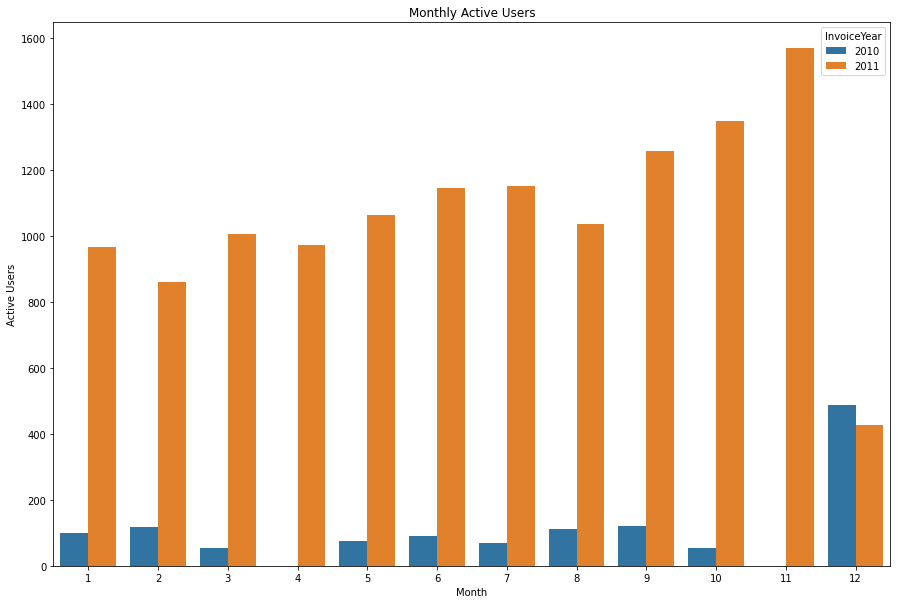

In [ ]:
# Monthly Active Customers
df_active=df.groupby(["InvoiceMonth", "InvoiceYear"])["CustomerID"].nunique().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="CustomerID", hue="InvoiceYear", data=df_active)
plt.title("Monthly Active Users")
plt.xlabel("Month")
plt.ylabel("Active Users")

Text(0, 0.5, 'Revenue')

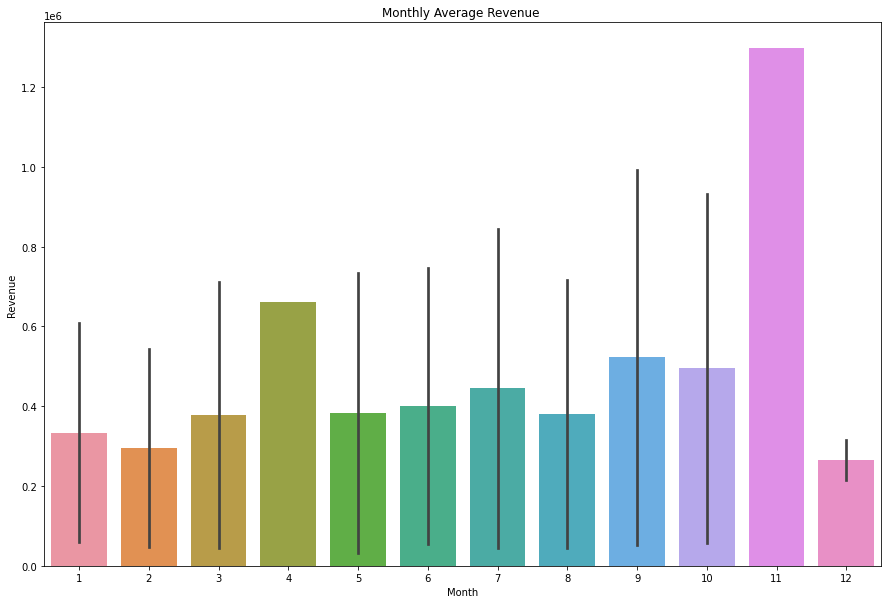

In [ ]:
# Average Revenue per Month
df_revenue_avg=df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", data=df_revenue)
plt.title("Monthly Average Revenue ")
plt.xlabel("Month")
plt.ylabel("Revenue")

As expected, the monthly items sold, monthly active users and average revenue per month shows positive correlation with the monthly revenue growth

Text(9.499616608796302, 0.5, 'Revenue')

<Figure size 432x288 with 0 Axes>

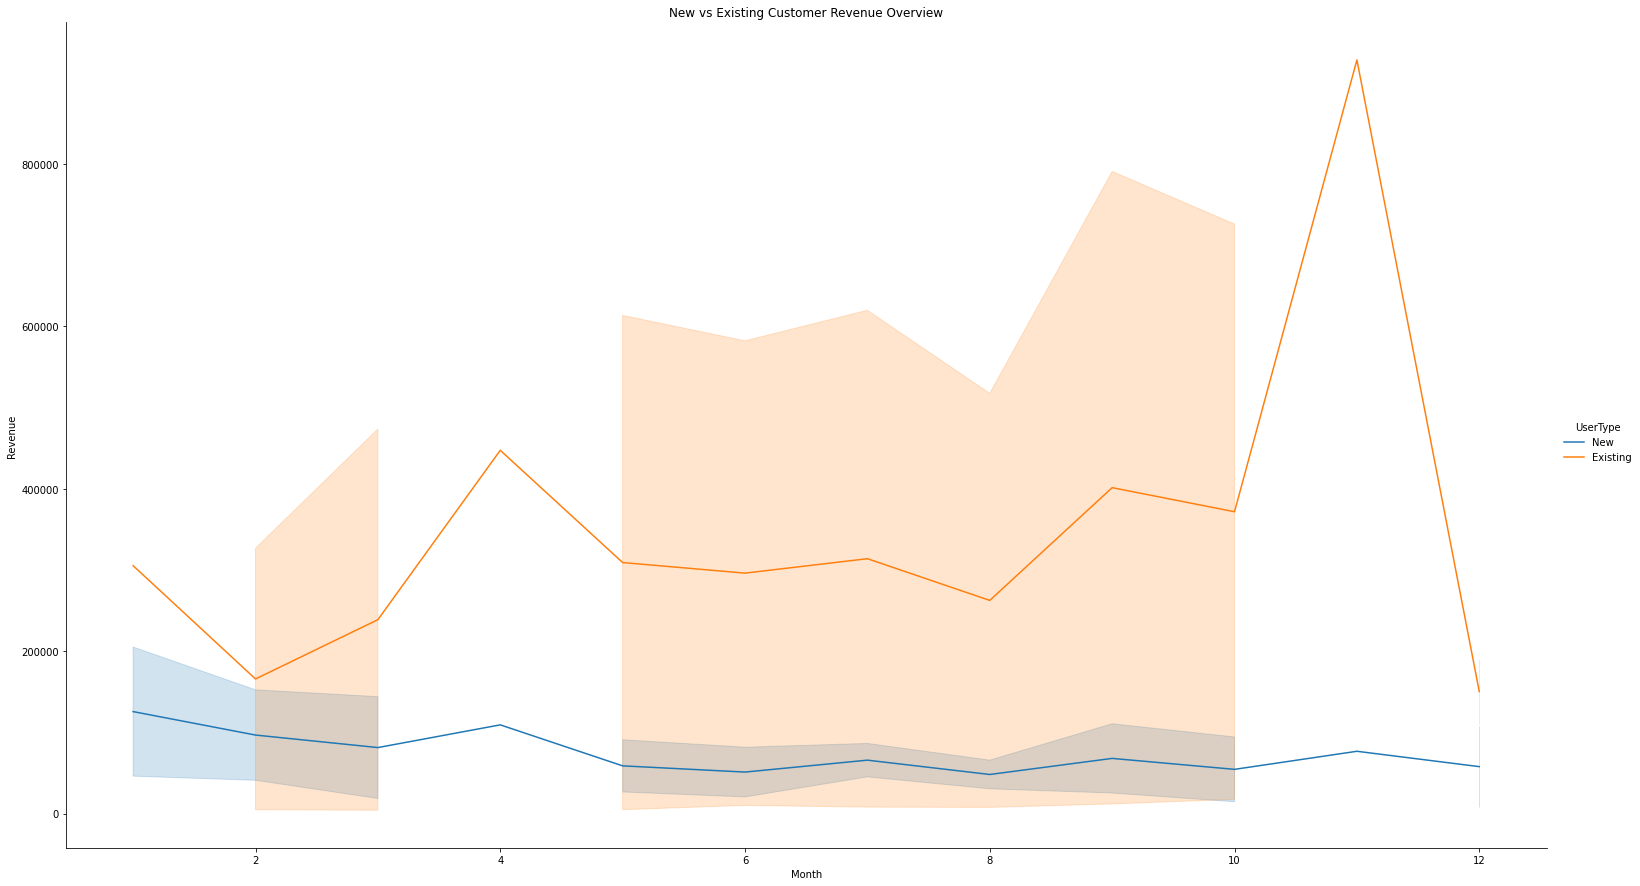

In [ ]:
# New vs Existing Users
df_first_purchase=df.groupby(["CustomerID"])["InvoiceDate"].min().reset_index()
df_first_purchase.columns=["CustomerID", "FirstPurchaseDate"]
df=pd.merge(df, df_first_purchase, on="CustomerID")
df["UserType"]="New"
df.loc[df["InvoiceDate"]>df["FirstPurchaseDate"], "UserType"]="Existing"
df.head()
# New vs Existing User Revenue Analysis
df_new_revenue=df.groupby(["InvoiceMonth", "InvoiceYear", "UserType"])["Revenue"].sum().reset_index()
plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="UserType", data=df_new_revenue, kind="line", height=12, aspect=18/10)
plt.title("New vs Existing Customer Revenue Overview")
plt.xlabel("Month")
plt.ylabel("Revenue")

In most cases, with the exception of the level, we see alignment on positive and negative revenue growth for new and existing customers. However, when we look at the revenue from January to February and October to November of 2011, we see that even though existing customer revenue grows, the new customer revenue declines.

# Customer Segmentation

Customer Segmentation

We analyzed our customers based on revenue, activity, new and existing customer monthly revenue and we definitely have some insights that we can take action from. We can also segment our customers in order to target our actions based on the main business problem we are working to solve.
We are going to use the RFM (Recency, Frequency and Monetary Value) strategy to analyze and estimate value of each customer and further segment them accordingly. Looking at Recency gives us how recently customers make a purchase, Frequency, how often they make a purchase, and Monetary Value shows us how often do they spend.

In [ ]:
# Recency Calculation
df_user=pd.DataFrame(df["CustomerID"].unique())
df_user.columns=["CustomerID"]
df_last_purchase=df.groupby(["CustomerID"])["InvoiceDate"].max().reset_index()
df_last_purchase.columns=["CustomerID", "LastPurchaseDate"]
df_last_purchase["Recency"]=(df_last_purchase["LastPurchaseDate"].max()-df_last_purchase["LastPurchaseDate"]).dt.days
df_recency=pd.merge(df_user, df_last_purchase[["CustomerID", "Recency"]])
df_recency.head()

,CustomerID,Recency
0,17850.0,69
1,13047.0,47
2,12583.0,0
3,13748.0,159
4,15100.0,70


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Customer Count')

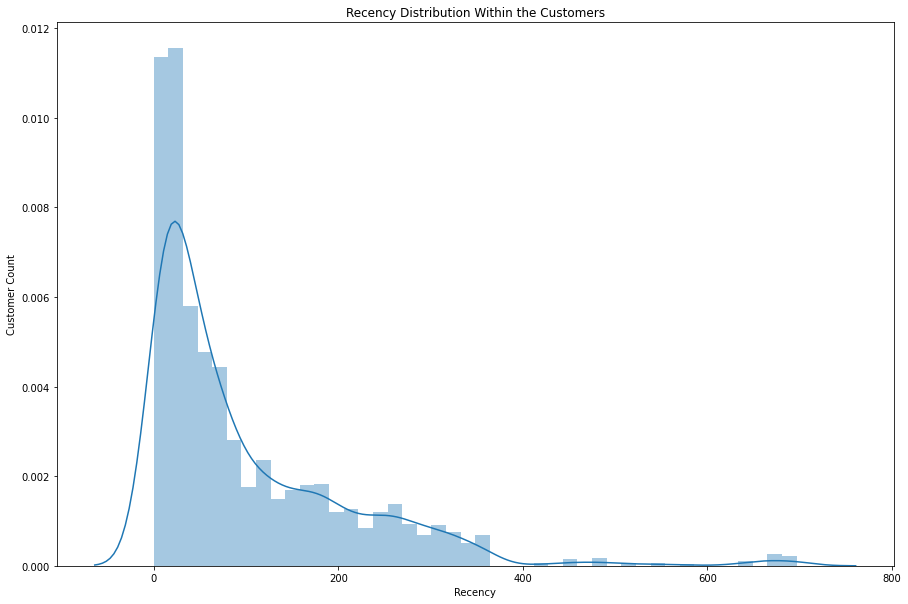

In [ ]:
# Look at the distribution of Recency
plt.figure(figsize=(15,10))
sns.distplot(df_recency["Recency"])
plt.title("Recency Distribution Within the Customers")
plt.xlabel("Recency")
plt.ylabel("Customer Count")

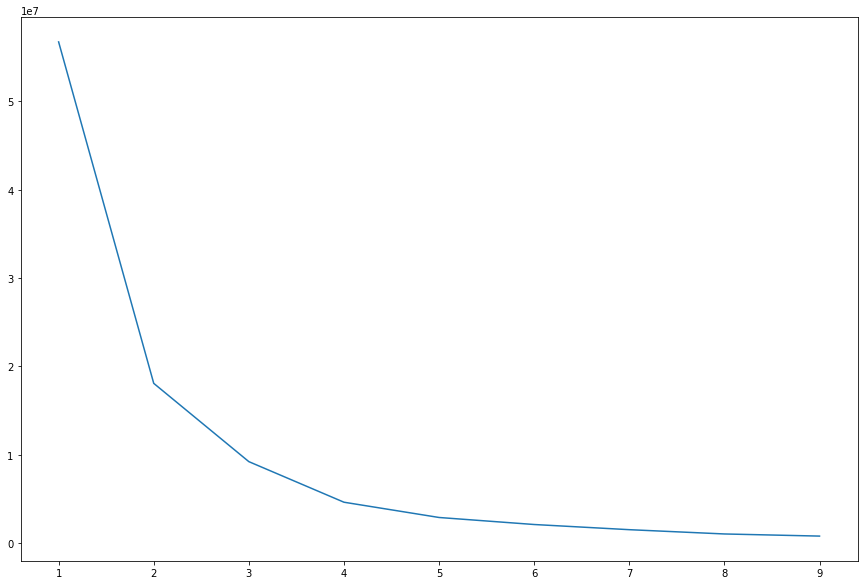

In [ ]:
# use KMeans Clustering for Recency Clustering
from sklearn.cluster import KMeans
# find out how many clusters are optimal
y=df_recency[["Recency"]] # label what we are clustering
dic={} # store the clustering values in a dictionary
for k in range(1,10):
    kmeans=KMeans(n_clusters=k, max_iter=1000).fit(y)
    y["clusters"]=kmeans.labels_
    dic[k]=kmeans.inertia_
plt.figure(figsize=(15,10))
plt.plot(list(dic.keys()), list(dic.values()))
plt.show()

In [ ]:
# Cluster Customer based on Recency
kmodel_recency=KMeans(n_clusters=4)
kmodel_recency.fit(y)
kpredict_recency=kmodel_recency.predict(y)
kpredict_recency[0:5]
df_recency["RecencyCluster"]=kpredict_recency
df_recency.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,69,0
1,13047.0,47,0
2,12583.0,0,0
3,13748.0,159,3
4,15100.0,70,0


In [ ]:
# get statistical analysis for each cluster
df_recency.groupby(["RecencyCluster"])["Recency"].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,2737.0,32.623676,24.264566,0.0,12.0,25.0,51.0,88.0
1,615.0,278.869919,44.490412,212.0,243.0,270.0,312.0,424.0
2,76.0,589.000000,94.168501,454.0,485.0,638.0,666.0,697.0
3,944.0,144.022246,34.866303,89.0,114.0,143.0,174.0,211.0


We segmented our customers into 4 different clusters which are from 0 to 4. We have 524 customers in Cluster 0, 2157 customers in Cluster 1, 632 customers in Cluster 2 and 1059 Customers in Cluster 3. When we compare the recency, the cluster 0 is the best performing customer set and cluster 1 is the worst performing cluster set.
We can further look at frequency and segment customers based on how often do they purchase.


In [ ]:
# frequency of orders
df_frequency=df.groupby(["CustomerID"])["InvoiceDate"].count().reset_index()
df_frequency.columns=["CustomerID", "Frequency"]
df_frequency=pd.merge(df_user, df_frequency, on="CustomerID")
df_frequency.head()

,CustomerID,Frequency
0,17850.0,312
1,13047.0,196
2,12583.0,251
3,13748.0,28
4,15100.0,6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

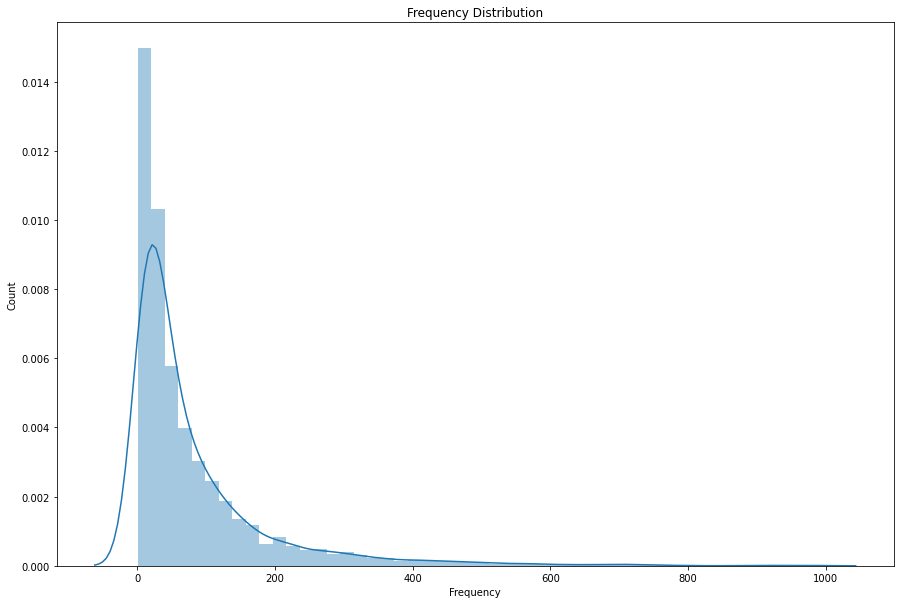

In [ ]:
# Review of Frequency Distribution
plt.figure(figsize=(15,10))
sns.distplot(df_frequency.query("Frequency<1000")["Frequency"])
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

In [ ]:
# Customer Segmentation based on Frequency
x=df_frequency[["Frequency"]]
k_model_frequency=KMeans(n_clusters=4)
k_model_frequency.fit(x)
k_model_frequency_predict=k_model_frequency.predict(x)
df_frequency["FrequencyCluster"]=k_model_frequency_predict
df_frequency.head()
# Statistical Analysis of clusters based on frequency
df_frequency.groupby(["FrequencyCluster"])["Frequency"].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3862.0,49.753755,44.812998,1.0,15.0,34.0,73.0,189.0
1,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0
2,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0
3,482.0,329.107884,132.670589,190.0,228.0,286.0,393.5,803.0


Cluster 0 has the most customers and Cluster 2 has the least based on Frequency. Based on this segmentation we see that cluster 0 has the least frequency customers however has the most amount of customers.
Finally, we can segment our customers based on their monetary value.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


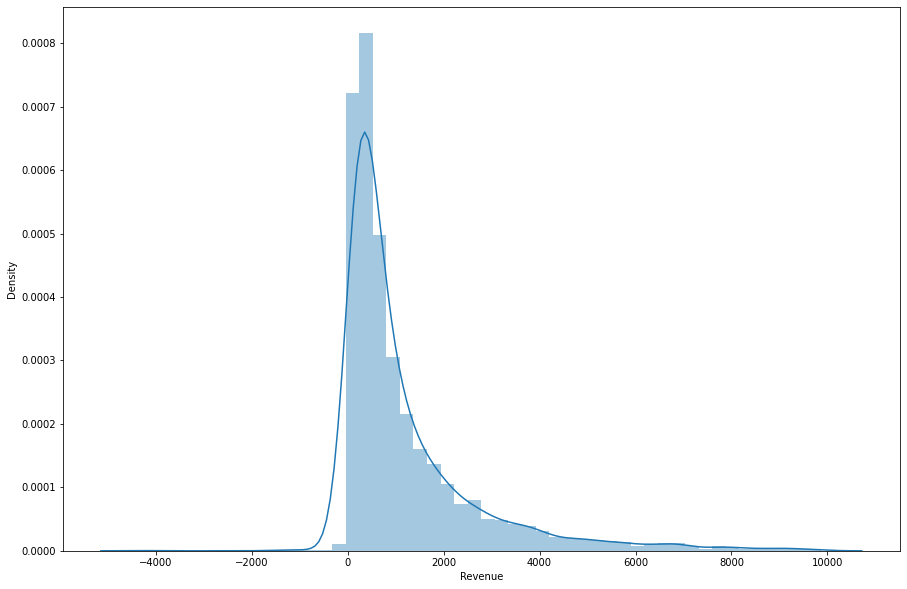

In [ ]:
df_customer_revenue=df.groupby(["CustomerID"])["Revenue"].sum().reset_index()
df_customer_revenue=pd.merge(df_user, df_customer_revenue, on="CustomerID")
df_customer_revenue.head()
# Revenue Distribution
plt.figure(figsize=(15,10))
sns.distplot(df_customer_revenue.query("Revenue < 10000")["Revenue"])

In [ ]:
# Segmenting Customers Based on their Monetary Value
a=df_customer_revenue[["Revenue"]]
k_model_revenue=KMeans(n_clusters=4)
k_model_revenue.fit(a)
k_model_revenue_pred=k_model_revenue.predict(a)
df_customer_revenue["RevenueCluster"]=k_model_revenue_pred
df_customer_revenue.groupby(["RevenueCluster"])["Revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4252.0,1160.746285,1403.441736,-4287.63,286.565,623.575,1476.0700,8257.04
1,3.0,241136.560000,47874.073443,187482.17,221960.330,256438.490,267963.7550,279489.02
2,15.0,71423.516000,28632.631870,50415.49,52287.280,57385.880,77008.7300,132572.62
3,102.0,15390.295980,7557.269118,8393.22,10192.235,12395.080,17460.8075,40340.78


Conclusion

With the recency, frequency, monetary value segmentation and our exploratory analysis of our customers, we can further decide our purchase cycle of our products, prioritize and define our marketing campaigns. For example, we can look at our current marketing campaigns, inventory purchase strategies and operations for the months of January and October to see if we can entice more new users in order to turn the negative revenue growth of new users to positive. We can investigate the historical marketing campaigns in order to see what impact they provide for each recency and frequency clusters. We can further apply this to our main business goal to scale the business. We can also assign a 1–10 score for each category of RFM. For example customer will get a recency score of 1 if they haven't made a purchase for a year and gets a recency score of 10 if they made a purchase within the last month. We can further add all these scores for each category and create a customer value for each cluster. These actions will contribute drastically to our success for scalability of our business.